## Notebook for plotting the Arbin data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path, getcwd
import sys

In [3]:
# Define a function to get the filenames based on the naming convention
# Define the directory where the files are stored
dir_path = path.join(path.dirname(getcwd()), "566_data_analysis", "Data", "0050_capa_OCV+Westart_PEHV75AH_1_1_2023_12_12_160601")
def get_files(channel_num):
    file_name = f"0050_capa_OCV+Westart_PEHV75AH_1_1_Channel_{channel_num}_Wb_1"
    full_path = path.join(dir_path, f"{file_name}.csv")
    return [full_path]


# Dictionary to store the charge and discharge dataframes for each channel
charge_dataframes = {}
discharge_dataframes = {}

# Loop through each channel
for i in range(1, 3):
    files = get_files(i)
    print(files)
    
    # Create dataframes for each process and channel
    charge_df_channel = pd.DataFrame()
    discharge_df_channel = pd.DataFrame()
    
    # Read and filter data for each file
    for file in files:
        df = pd.read_csv(file)
        
        # Filter for Charge process
        charge_df = df[df['Step Index'] == 17][['Step Time (s)', 'Voltage (V)', 'Charge Capacity (Ah)']]
        charge_df_channel = pd.concat([charge_df_channel, charge_df], ignore_index=True)
        
        # Filter for Discharge process
        discharge_df = df[df['Step Index'] == 14][['Step Time (s)', 'Voltage (V)', 'Discharge Capacity (Ah)']]
        discharge_df_channel = pd.concat([discharge_df_channel, discharge_df], ignore_index=True)
    
    # Store the dataframes in the dictionaries
    charge_dataframes[f"channel_{i}"] = charge_df_channel
    discharge_dataframes[f"channel_{i}"] = discharge_df_channel

# Print one charge dataframe as a check
print(charge_dataframes["channel_2"].head())

['c:\\Users\\GMa\\OneDrive - CSEM S.A\\Documents\\Notebooks_shared\\566_data_analysis\\Data\\0050_capa_OCV+Westart_PEHV75AH_1_1_2023_12_12_160601\\0050_capa_OCV+Westart_PEHV75AH_1_1_Channel_1_Wb_1.csv']
['c:\\Users\\GMa\\OneDrive - CSEM S.A\\Documents\\Notebooks_shared\\566_data_analysis\\Data\\0050_capa_OCV+Westart_PEHV75AH_1_1_2023_12_12_160601\\0050_capa_OCV+Westart_PEHV75AH_1_1_Channel_2_Wb_1.csv']
   Step Time (s)  Voltage (V)  Charge Capacity (Ah)
0         1.0002       2.9770                 0.001
1         2.0001       2.9779                 0.002
2         3.0001       2.9788                 0.003
3         4.0001       2.9796                 0.004
4         5.0001       2.9803                 0.005


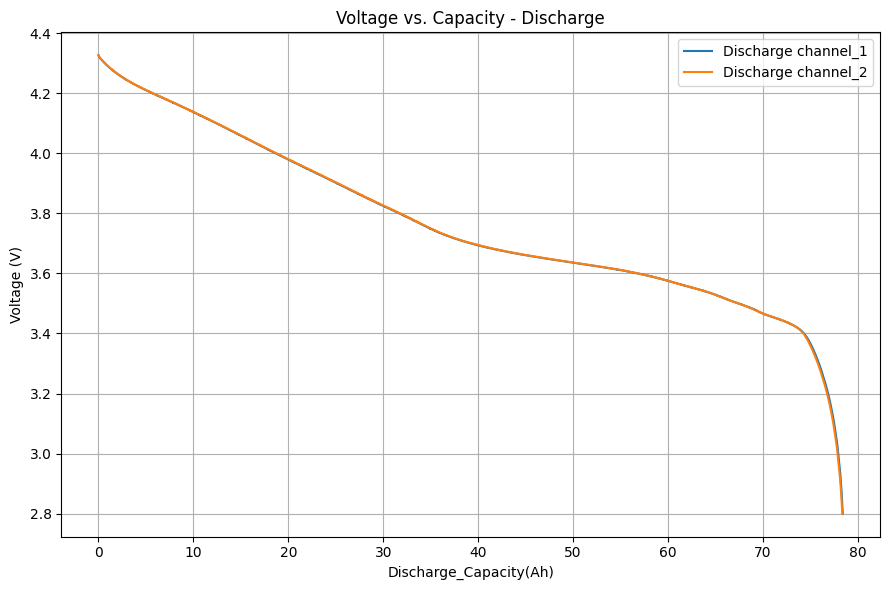

In [4]:
# Set up the subplots: 1 row, 2 columns
fig, discharge_ax = plt.subplots(figsize=(9, 6))


for i, (key_discharge, df_discharge) in enumerate(discharge_dataframes.items()):
    # Plot discharge data for the channel
    discharge_ax.plot(df_discharge['Discharge Capacity (Ah)'], df_discharge['Voltage (V)'], label=f'Discharge {key_discharge}')

# Customize the discharge subplot
discharge_ax.set_title('Voltage vs. Capacity - Discharge')
discharge_ax.set_xlabel('Discharge_Capacity(Ah)')
discharge_ax.set_ylabel('Voltage (V)')
discharge_ax.grid(True)
discharge_ax.legend()
plt.tight_layout()
plt.show()

In [5]:
# Loop through the charge_dataframes
for key, df in charge_dataframes.items():
    # Estimate the maximum value of 'Charge_Capacity(Ah)'
    max_capacity = df['Charge Capacity (Ah)'].max()
    # Create the 'SoC' column
    df['SoC'] = df['Charge Capacity (Ah)'] / max_capacity

# Similarly, loop through the discharge_dataframes
for key, df in discharge_dataframes.items():
    # Estimate the maximum value of 'Discharge_Capacity(Ah)'
    max_capacity = df['Discharge Capacity (Ah)'].max()
    # Create the 'SoC' column
    df['SoC'] = (max_capacity - df['Discharge Capacity (Ah)']) / max_capacity

# Print the updated dataframe as a check for both charge and discharge
print(charge_dataframes["channel_1"].head())
print(discharge_dataframes["channel_1"].head())

   Step Time (s)  Voltage (V)  Charge Capacity (Ah)       SoC
0         1.0006       3.0049                 0.001  0.000013
1         2.0004       3.0058                 0.002  0.000025
2         3.0002       3.0067                 0.003  0.000038
3         4.0005       3.0075                 0.004  0.000051
4         5.0006       3.0081                 0.005  0.000063
   Step Time (s)  Voltage (V)  Discharge Capacity (Ah)       SoC
0         1.0005       4.3263                    0.001  0.999987
1         2.0002       4.3261                    0.002  0.999974
2         3.0000       4.3259                    0.003  0.999962
3         4.0002       4.3258                    0.004  0.999949
4         5.0005       4.3257                    0.005  0.999936


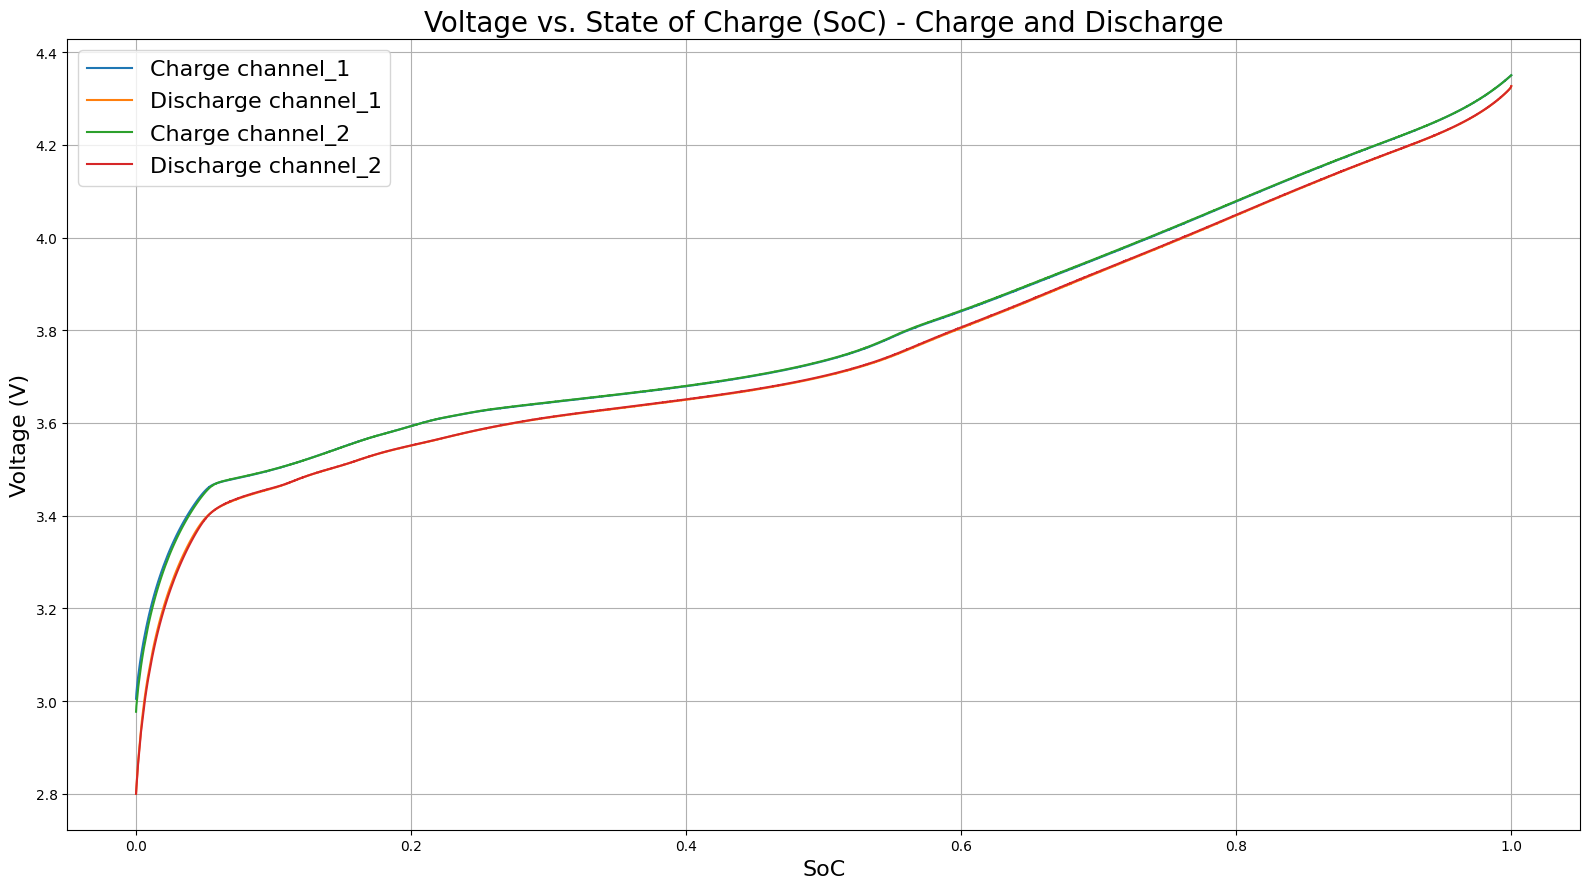

In [7]:
import matplotlib.pyplot as plt

# Create a single plot
fig, ax = plt.subplots(figsize=(16, 9))

# Loop through each channel
for i, (charge_item, discharge_item) in enumerate(zip(charge_dataframes.items(), discharge_dataframes.items())):
    key_charge, df_charge = charge_item
    key_discharge, df_discharge = discharge_item

    # Plot charge data for the channel
    ax.plot(df_charge['SoC'], df_charge['Voltage (V)'], label=f'Charge {key_charge}')

    # Plot discharge data for the channel
    ax.plot(df_discharge['SoC'], df_discharge['Voltage (V)'], label=f'Discharge {key_discharge}')

# Customize the plot
ax.set_title('Voltage vs. State of Charge (SoC) - Charge and Discharge', fontsize=20)
ax.set_xlabel('SoC', fontsize=16)
ax.set_ylabel('Voltage (V)', fontsize=16)
ax.grid(True)
ax.legend(fontsize=16)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


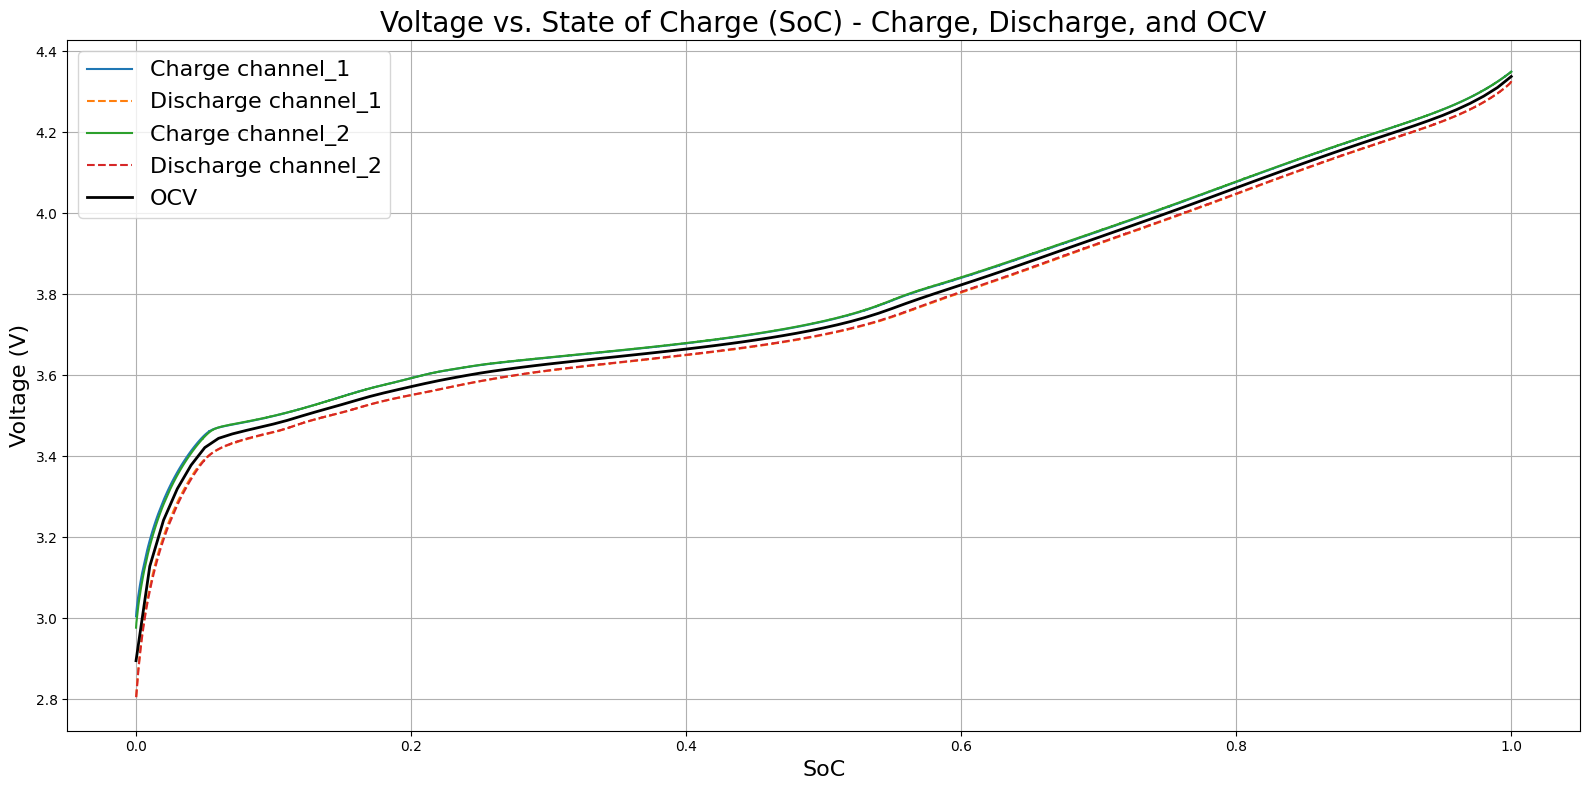

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create a single plot
fig, ax = plt.subplots(figsize=(16, 8))

# Create an array of SoC values spaced by 0.01
soc_values = np.arange(0, 1.01, 0.01)

# Initialize list to store average voltages for each SoC
average_voltages = []

# Function to find the closest voltage for a given SoC
def find_closest_voltage(df, soc):
    return df.iloc[(df['SoC']-soc).abs().argsort()[:1]]['Voltage (V)'].values[0]

# Loop through each SoC value
for soc in soc_values:
    voltages = []
    # Loop through each dataset
    for charge_item, discharge_item in zip(charge_dataframes.items(), discharge_dataframes.items()):
        _, df_charge = charge_item
        _, df_discharge = discharge_item

        # Find the closest voltage in each dataset and add to the list
        voltages.append(find_closest_voltage(df_charge, soc))
        voltages.append(find_closest_voltage(df_discharge, soc))

    # Calculate the average voltage for this SoC and add to the list
    average_voltages.append(np.mean(voltages))

# Plot the original charge and discharge curves
for i, (charge_item, discharge_item) in enumerate(zip(charge_dataframes.items(), discharge_dataframes.items())):
    key_charge, df_charge = charge_item
    key_discharge, df_discharge = discharge_item
    ax.plot(df_charge['SoC'], df_charge['Voltage (V)'], label=f'Charge {key_charge}')
    ax.plot(df_discharge['SoC'], df_discharge['Voltage (V)'], label=f'Discharge {key_discharge}', linestyle='--')

# Plot the OCV data
ax.plot(soc_values, average_voltages, label='OCV', color='black', linewidth=2)

# Customize the plot
ax.set_title('Voltage vs. State of Charge (SoC) - Charge, Discharge, and OCV', fontsize=20)
ax.set_xlabel('SoC', fontsize=16)
ax.set_ylabel('Voltage (V)', fontsize=16)
ax.grid(True)
ax.legend(fontsize=16)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

